<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')
df.dropna(inplace=True)
df.head(2)

,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,169,210902_#4_100_30_1um_i002.tif:0124-0106,2977.920,438.884,94.390,40.169,85.995,0.194,113.371,102.0,147.0,79.919,53.536,2.350,0.426,0.654,0,0.472220,61.576014,0.44077
1,169,210902_#5_100_20_1um_i005.tif:0539-2012,2682.589,467.197,67.979,50.245,9.165,0.154,109.253,1990.0,535.0,177.397,74.108,1.353,0.739,0.476,0,0.678315,58.442950,0.39299


In [6]:
df_kcluster = df[['Perim.', 'Equivalent Diameter','Circ sqrt','Solidity', 'AR2' ,'Area']].copy()
df_kcluster.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,438.884,61.576014,0.44077,0.654,0.472220,2977.920
1,467.197,58.442950,0.39299,0.476,0.678315,2682.589


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_kcluster)
X = scaler.transform(df_kcluster)
X = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)
y= df['Group']

In [53]:
X

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.962833,0.789433,-1.243609,-0.683978,-1.008594,0.447937
1,1.096569,0.649360,-1.454779,-1.626702,0.423065,0.324311
2,-0.217132,-0.504210,-0.794686,-0.980565,-0.525392,-0.448347
3,0.777730,0.536036,-1.249505,-0.991158,1.154329,0.229017
4,-0.083401,0.171113,-0.142070,-0.048434,-0.069816,-0.049140
...,...,...,...,...,...,...
1139,-0.415901,0.073521,1.112146,1.111433,0.939040,-0.116104
1140,-0.589739,-0.467126,1.025802,1.037287,0.747062,-0.430318
1141,-0.608784,-0.531287,0.998282,0.862512,0.405053,-0.461225
1142,-0.624518,-0.564470,1.033790,1.063768,0.149211,-0.476678


In [48]:
from sklearn.cluster import SpectralClustering

In [49]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=466)
model.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=466)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.labels_[model.labels_ == 2] = 1
print(confusion_matrix(df['Group'],model.labels_))
print(round(accuracy_score(df['Group'],model.labels_),2))

[[554  27]
 [  3 560]]
0.97


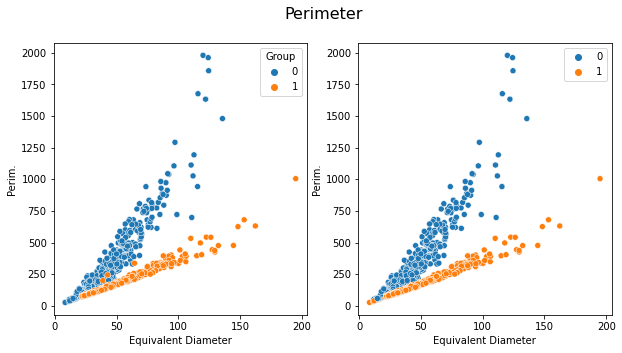

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Perimeter', fontsize=16)
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

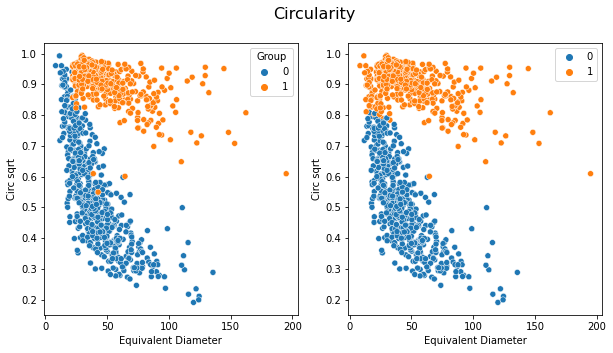

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Circularity', fontsize=16)
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

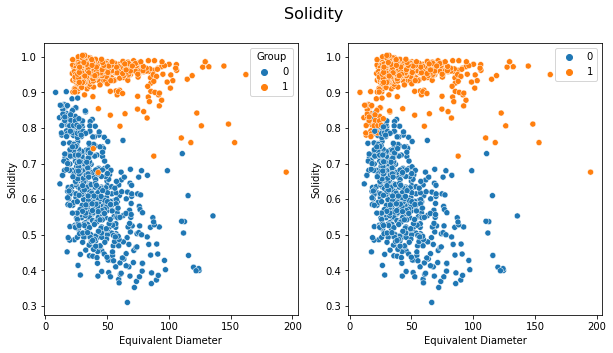

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Solidity', fontsize=16)
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB()
         }

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
score = []
results = pd.DataFrame()
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score.append([name,accuracy_score(y_test,y_pred)])
    results[name] = model.predict(X)
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
0,KNeighborsClassifier,1.000000
1,LogisticRegression,1.000000
5,AdaBoostClassifier,1.000000
2,SVC,0.995633
3,DecisionTreeClassifier,0.995633
4,RandomForestClassifier,0.995633
6,GaussianNB,0.969432


In [39]:
results

,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GaussianNB
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1139,1,1,1,1,1,1,1
1140,1,1,1,1,1,1,1
1141,1,1,1,1,1,1,1
1142,1,1,1,1,1,1,1


In [56]:
len(results.columns)

7

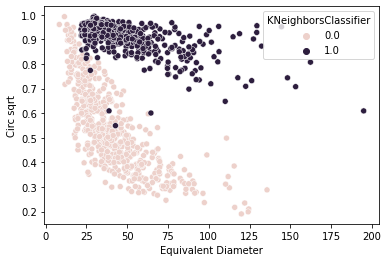

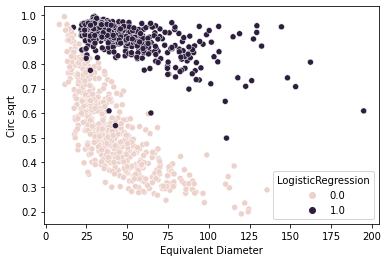

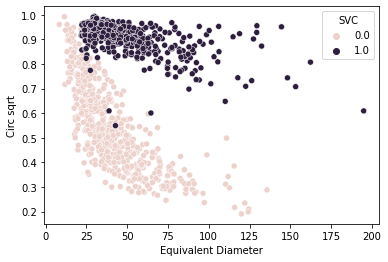

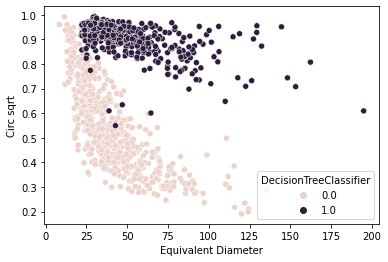

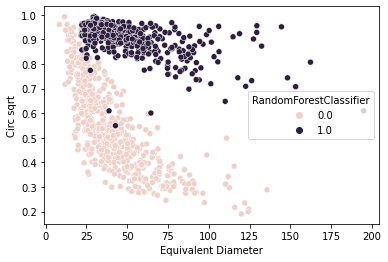

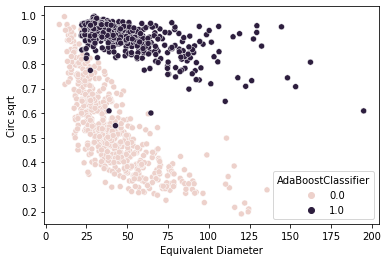

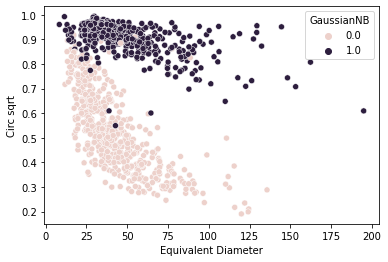

In [67]:
for columns in results.columns:
    sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=results[columns])
    plt.show()

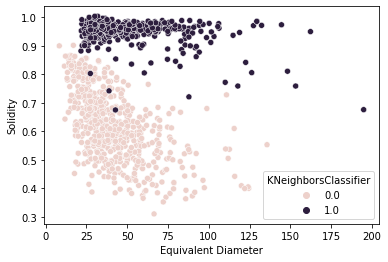

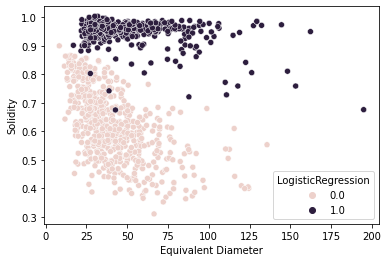

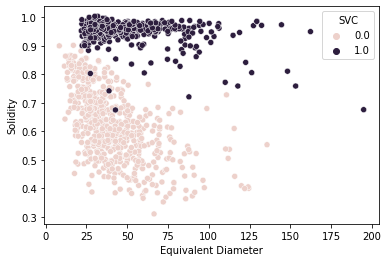

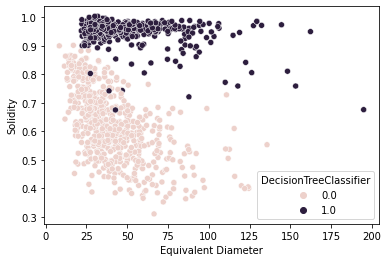

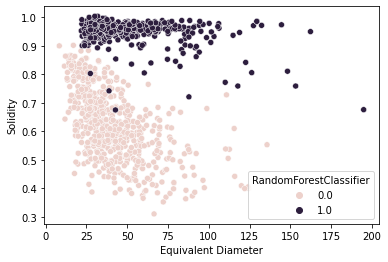

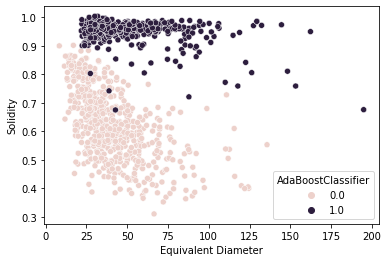

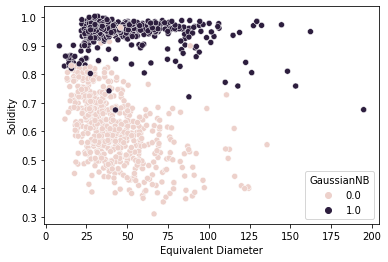

In [54]:
for columns in results.columns:
    sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=results[columns])
    plt.show()